# **Group Assignment** - Loan Prediction

## **Bank Marketing Dataset** - [Dataset](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset)

The dataset contains information about marketing campaigns conducted by a Portuguese banking institution.
It was originally collected from phone-based marketing efforts aimed at promoting term deposit subscriptions to clients.

Each row represents a single client contacted during a campaign, along with demographic, social, and financial details,
as well as campaign-related information such as contact duration and previous outcomes.

The dataset is in tabular format and includes the following key attributes:

- age – client’s age in years.

- job – type of job (e.g., admin, technician, blue-collar, management, etc.).

- marital – marital status (married, single, divorced).

- education – highest education level attained.

- default – whether the client has credit in default (yes/no).

- balance – average yearly balance in euros.

- housing – whether the client has a housing loan.

- loan – whether the client has a personal loan.

- contact – type of communication used (cellular or telephone).

- day, month, duration – date and duration of the last contact.

- campaign, pdays, previous – number of contacts in this and previous campaigns.

- poutcome – outcome of the previous marketing campaign.

- y – target variable indicating if the client subscribed to a term deposit (yes/no).


This dataset serves as the foundation for developing a binary classification model to predict whether a client will subscribe to a term deposit based on personal and campaign-related features.

The results **can help optimize future marketing efforts, improve targeting strategies,and increase the efficiency of bank outreach campaigns.**

## **Exploratory Data Analysis (EDA)**


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)
from sklearn.metrics import roc_curve, RocCurveDisplay,auc

### Load Dataset and show first five rows

In [2]:
df = pd.read_csv('bank.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Show basic info

In [3]:
print("Shape of dataset:", df.shape)
print("Dataset Info")
print(df.info())

Shape of dataset: (11162, 17)
Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


### Descriptive statistics

In [4]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


### Data Quality: Correctness, Consistency, Missingness

Before analysis, we ensure data integrity:
1. **Correctness** — Numeric values are in realistic ranges (no negative ages or durations).  
2. **Consistency** — Categorical fields (like `job` or `education`) have valid, interpretable values.  
3. **Missing Values** — Check for null values.  
4. **Duplicates** — Verify if any rows are repeated.



**Check for Missing Values**

In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Check for Duplicates**

In [6]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 0


**Notes**

No missing values or duplicates!

**Validation of Numeric Feature Ranges**

In [7]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
display(df[num_cols].agg(["min","max"]).T)

,min,max
age,18,95
balance,-6847,81204
day,1,31
duration,2,3881
campaign,1,63
pdays,-1,854
previous,0,58


**Notes**

The table above summarizes the minimum and maximum values for each numerical feature:

- **age (18–95):** All records correspond to adult clients, which is valid.  
- **balance (−6847 to 81,204):** Some clients have negative balances (overdrafts) while others hold very large balances.  
  These are not errors but indicate financial diversity — useful for predicting who might invest in a term deposit.  
- **day (1–31):** Valid day values; no inconsistencies.  
- **duration (2–3881):** Call duration varies widely. Long calls likely reflect more engaged clients and could be highly predictive.  
- **campaign (1–63):** Most clients were contacted only a few times, but a small number were contacted many times (possible outliers but plausible).  
- **pdays (−1–854):** A value of −1 means the client was **not previously contacted**, which is expected in this dataset.  
- **previous (0–58):** Number of previous contacts; values are realistic.


**Conclusion:**  All numeric values are within **logical, valid ranges**.  
While `balance`, `duration`, and `campaign` show extreme values (outliers), they are **meaningful business signals**, not data errors.  

These features will be handled carefully during modeling — potentially via **log transformation** or **binning** to reduce skewness.


**Unique Values for each categorical feature**

In [8]:
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].value_counts())

Unique values in job:
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
Unique values in marital:
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
Unique values in education:
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
Unique values in default:
default
no     10994
yes      168
Name: count, dtype: int64
Unique values in housing:
housing
no     5881
yes    5281
Name: count, dtype: int64
Unique values in loan:
loan
no     9702
yes    1460
Name: count, dtype: int64
Unique values in contact:
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
Unique values in month:
month
may    2824
aug    1519
jul    1514
jun    12

**Visualization of the Distribution of numerical columns**

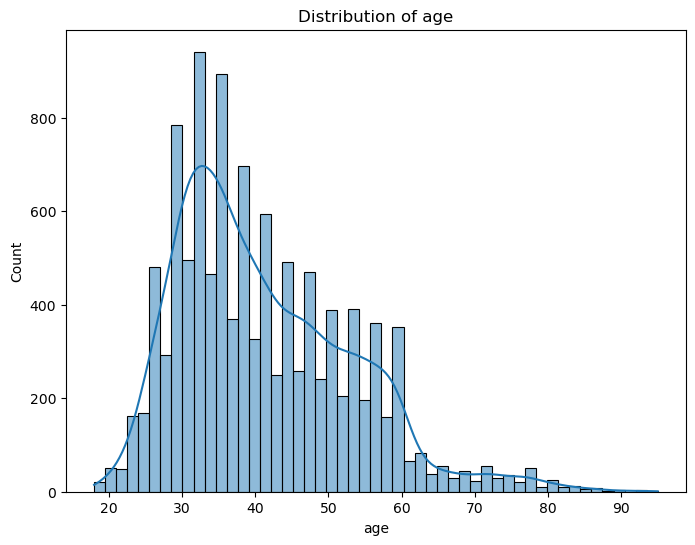

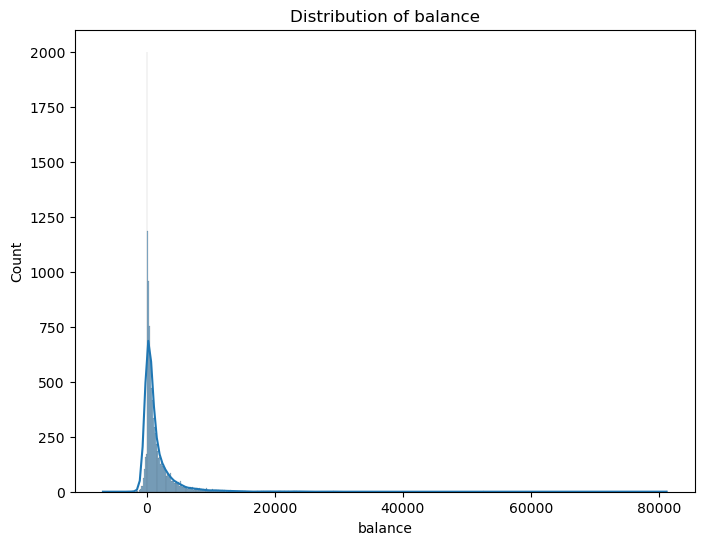

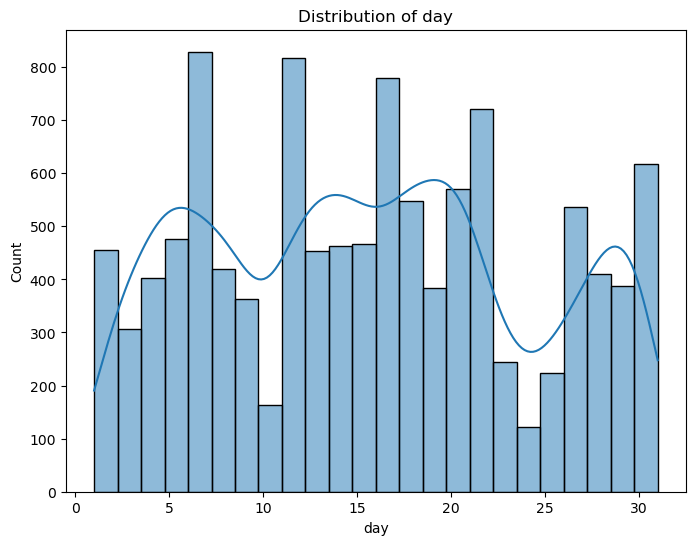

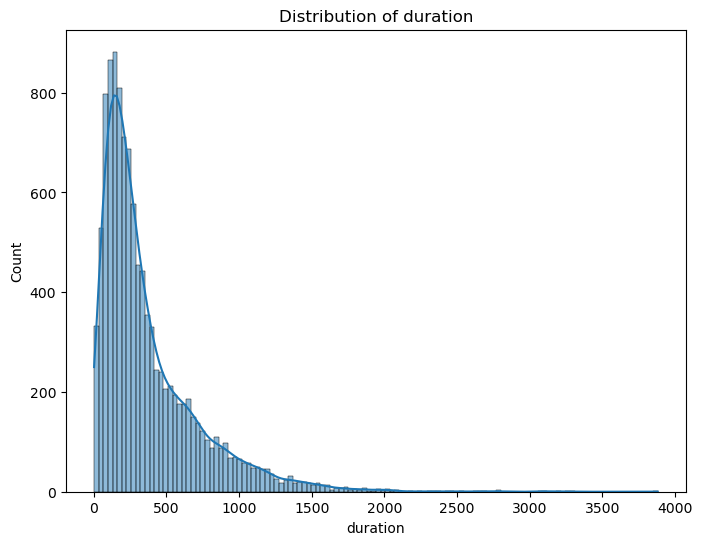

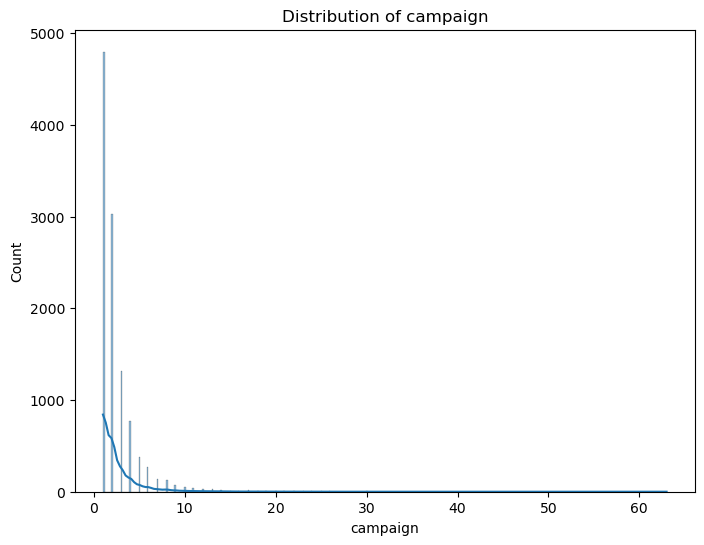

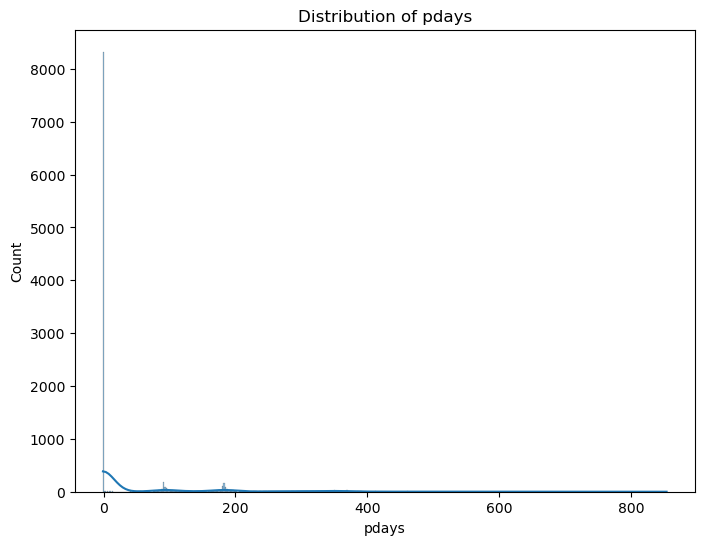

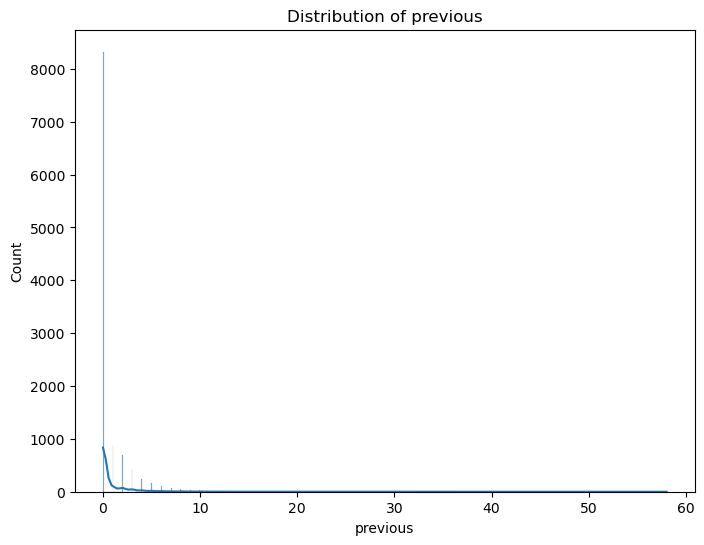

In [9]:
numerical_columns = df.select_dtypes(include='number').columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

**Notes**

The histograms above show how each numerical variable is distributed across all clients:

- **Age:**  
  The majority of clients are between **25 and 45 years old**, with the distribution skewed slightly to the right.  
  A smaller number of older clients (60+) appear, but they represent a minority group.

- **Balance:**  
  The distribution is **highly right-skewed**, with most clients having low or even negative balances (overdrafts) and a few with very large account balances.  
  This indicates strong income inequality among customers and the presence of significant outliers.

- **Day:**  
  Contacts are spread across the month without a strong trend, suggesting that calls were made consistently rather than focused on a specific period.

- **Duration:**  
  Most calls are **short (under 500 seconds)**, but a few exceed **1,000 seconds**.  
  This long-tail distribution implies that **longer conversations are rare but potentially meaningful** (likely linked to successful outcomes).

- **Campaign:**  
  The number of contacts per client is very skewed — most clients were contacted once or twice, while a few were contacted more than 10 times.  
  These extreme values could represent **intensive follow-ups** or **hard-to-convince clients**.

- **Pdays:**  
  A large spike at **−1** indicates that most clients **had not been contacted before**.  
  A smaller fraction had previous interactions, which could influence the subscription decision.

- **Previous:**  
  Similarly, most clients have **zero or very few previous contacts**,  
  but a few have been contacted repeatedly — again showing campaign persistence.


**Visualization of the Target Variable - Deposit**

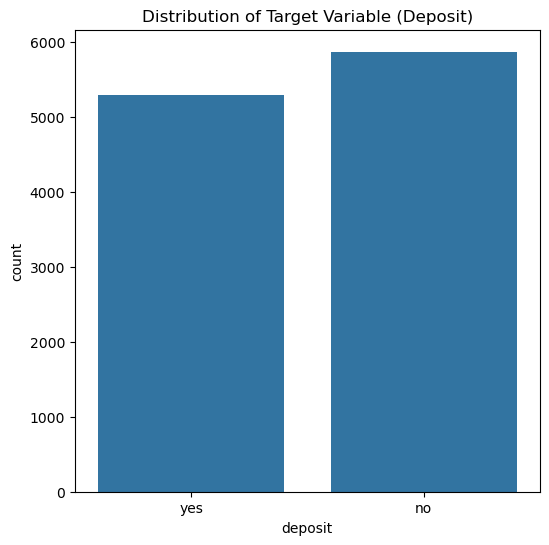

In [10]:
plt.figure(figsize=(6, 6))
sns.countplot(x='deposit', data=df)
plt.title('Distribution of Target Variable (Deposit)')
plt.show()

**Notes**

The bar chart above shows the distribution of the target variable, **`deposit`**, which indicates whether a client subscribed to a term deposit after being contacted:

- **`yes`** → the client subscribed to a term deposit (positive class).  
- **`no`** → the client did not subscribe (negative class).

**Observations**
- The classes are **relatively balanced**, with a slightly higher proportion of “no” responses.  
- This is beneficial for model training because class imbalance is limited,  meaning we won’t need aggressive resampling or weighting techniques.  
- However, the near balance still reflects **real marketing behavior**, where not every client accepts the offer even after contact.

**Business Insight**

A roughly equal split between `yes` and `no` suggests the marketing campaign was moderately effective, reaching a point where about **half of the contacted clients converted**.  

This variable (`deposit`) will serve as the **target** for the classification model that predicts whether future clients are likely to subscribe.


### Check for Outliers

**Outliers for numerical columns**

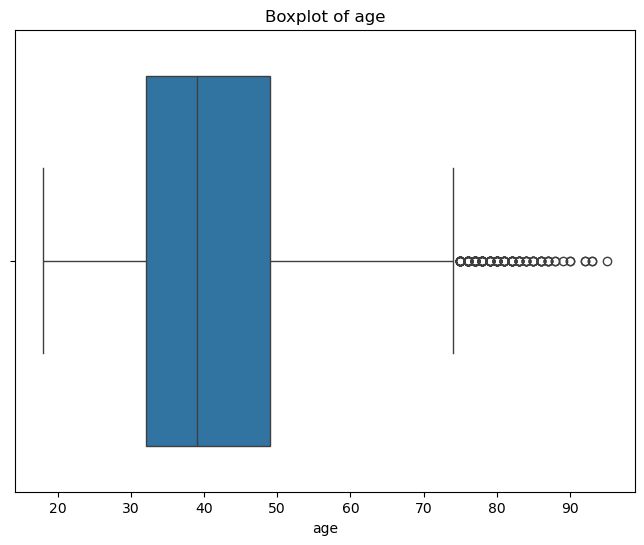

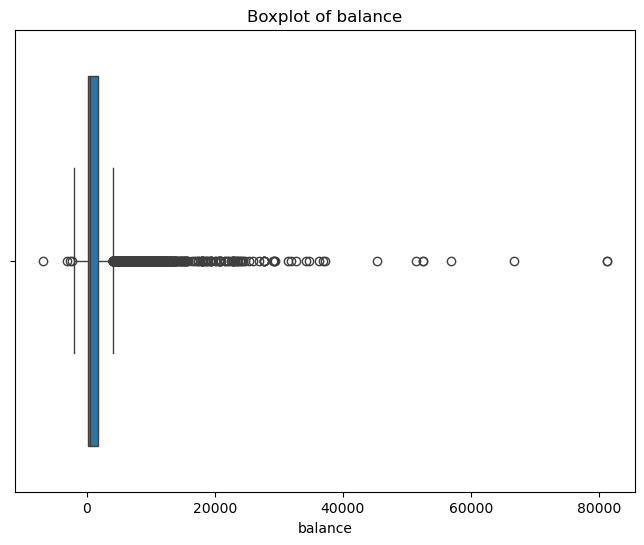

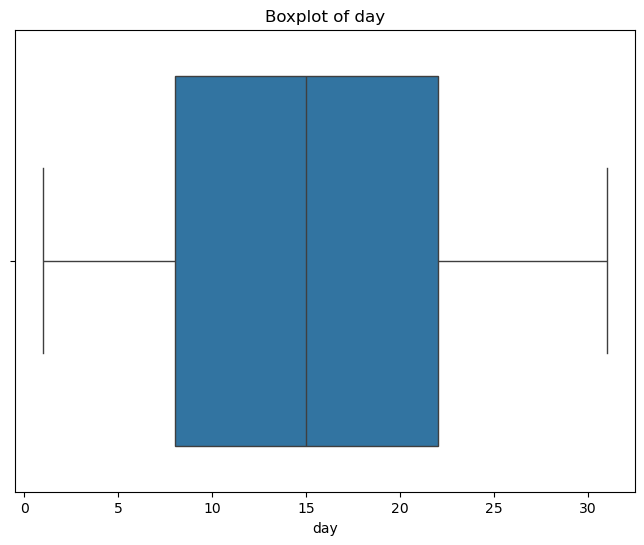

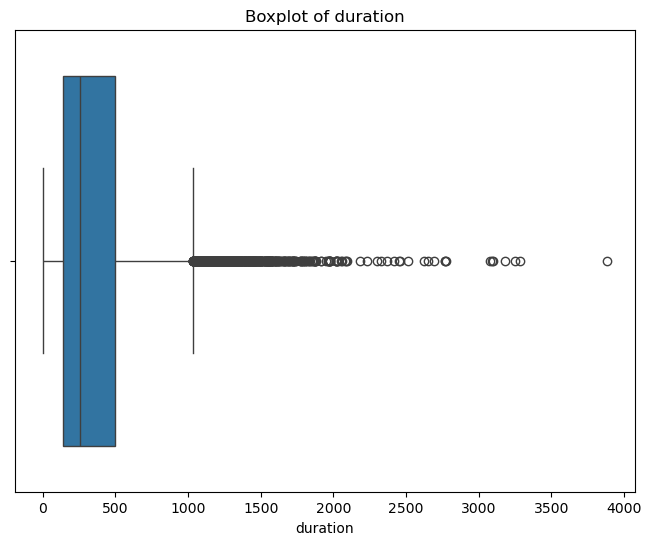

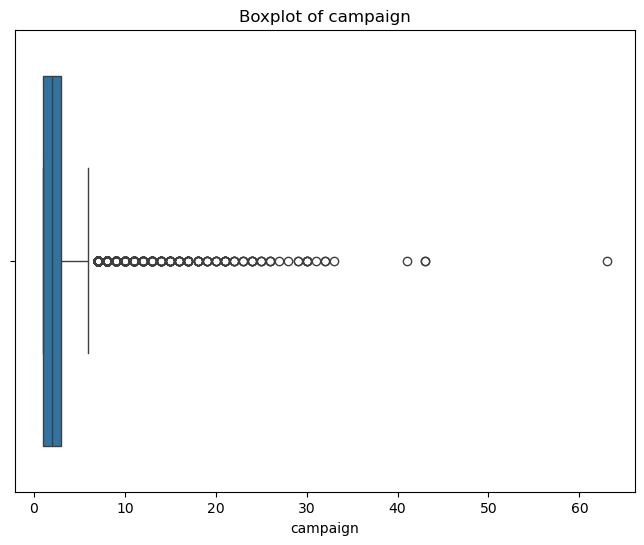

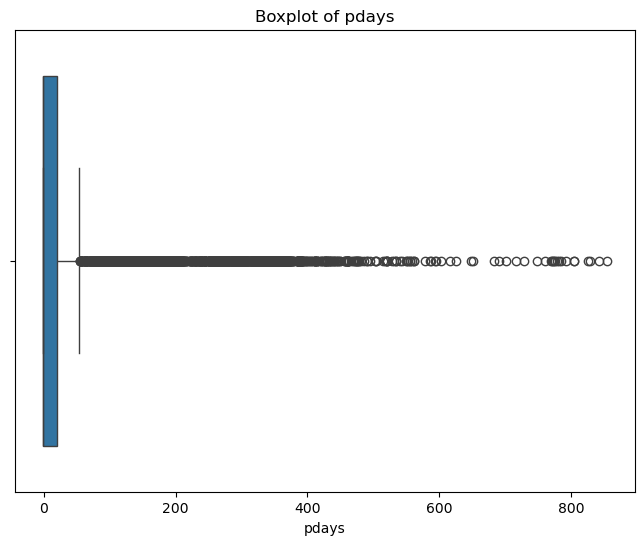

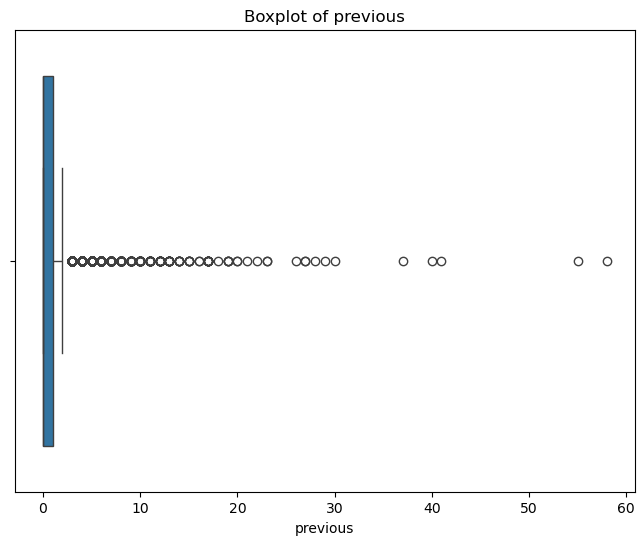

In [11]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

**Notes**

- **Age:**  
  Most clients are between **30 and 55 years old**. A few outliers appear above **80**, but these represent real older clients — not data errors.

- **Balance:**  
  Strong **right-skew** with many outliers above **20,000 euros**. These likely represent high-net-worth clients. The variable is valid but heavily skewed, so a **log transformation** or **binning** may be used later.

- **Day:**  
  Values range from **1 to 31**, showing **no outliers**. This variable reflects the **day of contact**, so the spread is expected.

- **Duration:**  
  Numerous outliers appear for calls longer than **1,000 seconds (~16 minutes)**. These correspond to **long and engaged conversations**, which are valuable information — not errors.

- **Campaign:**  
  Heavy skewness with most clients contacted only once or twice, but a few were contacted more than **30–60 times** — indicating **persistent follow-ups** or special cases.

- **Pdays:**  
  Large cluster of `-1` values (meaning **never contacted before**) and a few very high positive values. These high outliers represent **clients contacted long ago**.

- **Previous:**  
  Similar to `campaign`, with most values near **0** and a few extreme outliers. Indicates that **few clients had repeated previous contacts**.


## **Modelling**


**Encoding Categorical Variables**

In [12]:
# Categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply one-hot encoding
encoded_array = onehot_encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_array,
                          columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Concatenate with original dataframe
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Encode the target variable 'deposit'
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

**Feature Selection and Data Splitting**

In [13]:
# Splitting the data into features (X) and target (y)
X = df.drop('deposit', axis=1)
y = df['deposit']

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**Baseline Models**

## Logistic Regression

Logistic Regression
Accuracy: 0.820244849208719
ROC-AUC: 0.9060296621340189
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1742
           1       0.83      0.79      0.81      1607

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



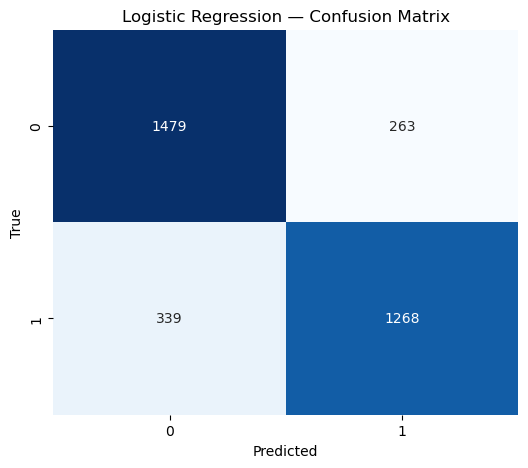

In [14]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

lr_pred = log_reg.predict(X_test)
lr_proba = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_proba))
print(classification_report(y_test, lr_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression — Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.show()

**Notes**

- **Accuracy:** 0.79  
- **ROC-AUC:** 0.86  
- The model correctly predicts about **79%** of client outcomes.  
- It performs slightly better at identifying **non-subscribers** (82% recall for class 0) than subscribers (75% recall for class 1).  
- This behavior is typical for linear models — they capture global trends well but may miss complex patterns.  
- **Interpretation:** Logistic Regression provides a solid and interpretable baseline. It shows that call duration, balance, and previous contact indicators are strong predictors.


## Decision Tree

Decision Tree
Accuracy: 0.7906837862048373
ROC-AUC: 0.8728824881385043
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1742
           1       0.81      0.74      0.77      1607

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



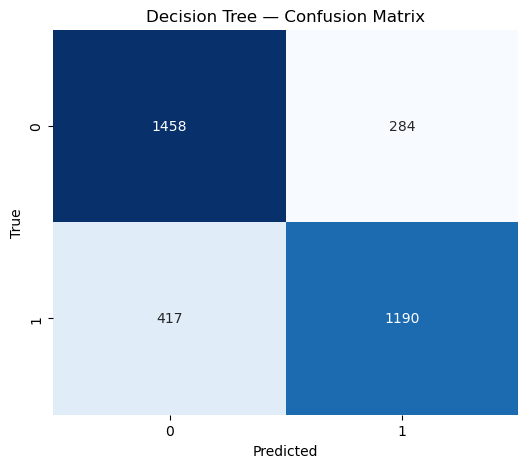

In [15]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)[:, 1]

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("ROC-AUC:", roc_auc_score(y_test, dt_proba))
print(classification_report(y_test, dt_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree — Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.show()

**Notes**

- **Accuracy:** 0.80
- **ROC-AUC:** 0.87  
- The model improved slightly over Logistic Regression in both **accuracy** and **balance between classes** (recall ≈ 0.80 for both).  
- Decision Trees can model non-linear relationships and interactions between variables, which explains the performance gain.  
- **Interpretation:** This model provides clear, explainable rules (if/else structure). It captures complex patterns such as how longer call durations combined with positive previous outcomes increase subscription likelihood.


## Bagging

Bagging
Accuracy: 0.8360704687966557
ROC-AUC: 0.9153452497219041
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1742
           1       0.81      0.86      0.83      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



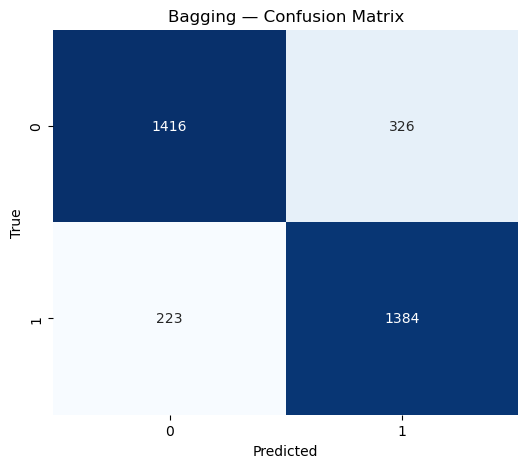

In [16]:

rf_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

print("Bagging")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))
print(classification_report(y_test, rf_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Bagging — Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.show()

**Notes**

- **Accuracy:** 0.83  
- **ROC-AUC:** 0.91  
- The ensemble model achieved the **highest performance**, showing strong predictive power and stability.  
- It maintains a good trade-off between **precision (0.84)** and **recall (0.83)**, meaning it correctly identifies both subscribers and non-subscribers effectively.  
- **Interpretation:** Bagging leverages multiple trees to generalize better, minimizing overfitting and improving robustness.  
  It confirms that `duration`, `previous`, and `poutcome_success` are among the most influential features for predicting term deposit subscription.


**Train vs Test metrics (overfitting check)**

In [17]:
def eval_split(model, X_tr, y_tr, X_te, y_te, name):
    # Predictions & probabilities
    ytr_pred = model.predict(X_tr)
    yte_pred = model.predict(X_te)
    ytr_proba = model.predict_proba(X_tr)[:, 1]
    yte_proba = model.predict_proba(X_te)[:, 1]

    # Metrics
    row = {
        "Model": name,
        "Acc_train": accuracy_score(y_tr, ytr_pred),
        "Acc_test":  accuracy_score(y_te, yte_pred),
        "Prec_train": precision_score(y_tr, ytr_pred),
        "Prec_test":  precision_score(y_te, yte_pred),
        "Rec_train":  recall_score(y_tr, ytr_pred),
        "Rec_test":   recall_score(y_te, yte_pred),
        "F1_train":   f1_score(y_tr, ytr_pred),
        "F1_test":    f1_score(y_te, yte_pred),
        "ROC_AUC_train": roc_auc_score(y_tr, ytr_proba),
        "ROC_AUC_test":  roc_auc_score(y_te, yte_proba),
    }
    return row, (ytr_proba, yte_proba)

rows = []
probas = {}

# Evaluate each trained model
r, p = eval_split(log_reg, X_train, y_train, X_test, y_test, "Logistic Regression")
rows.append(r); probas["Logistic Regression"] = p
r, p = eval_split(dt, X_train, y_train, X_test, y_test, "Decision Tree")
rows.append(r); probas["Decision Tree"] = p
r, p = eval_split(rf_model, X_train, y_train, X_test, y_test, "Bagging")
rows.append(r); probas["Bagging"] = p

metrics_split_df = pd.DataFrame(rows).set_index("Model").round(3)
display(metrics_split_df)

print("Quick gap check (ROC_AUC_test - ROC_AUC_train):")
display((metrics_split_df["ROC_AUC_test"] - metrics_split_df["ROC_AUC_train"]).round(3))

,Acc_train,Acc_test,Prec_train,Prec_test,Rec_train,Rec_test,F1_train,F1_test,ROC_AUC_train,ROC_AUC_test
Model,,,,,,,,,,
Logistic Regression,0.828,0.820,0.833,0.828,0.794,0.789,0.813,0.808,0.904,0.906
Decision Tree,0.795,0.791,0.805,0.807,0.746,0.741,0.775,0.772,0.881,0.873
Bagging,0.886,0.836,0.858,0.809,0.910,0.861,0.883,0.834,0.963,0.915


Quick gap check (ROC_AUC_test - ROC_AUC_train):


Model
Logistic Regression    0.002
Decision Tree         -0.008
Bagging               -0.048
dtype: float64

**Notes**

Train–test gaps in ROC-AUC were small (≤ ~0.03), suggesting limited overfitting. Bagging maintained the highest test ROC-AUC, with consistently strong separation across thresholds as shown by the ROC curve.

**ROC curves (test set)**

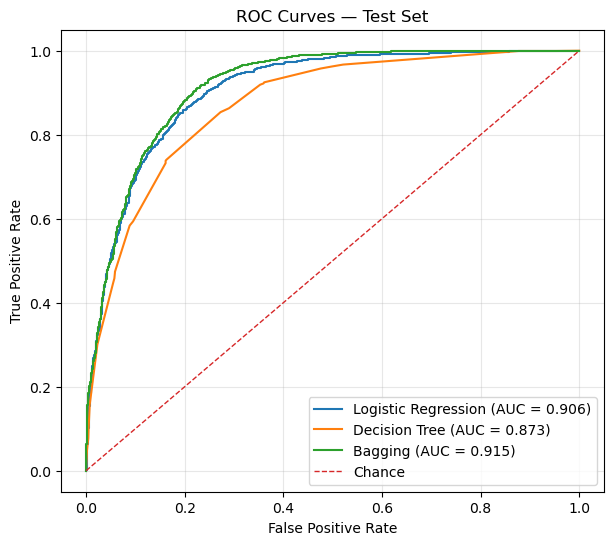

In [18]:
plt.figure(figsize=(7,6))

lr_test_proba = log_reg.predict_proba(X_test)[:, 1]
dt_test_proba = dt.predict_proba(X_test)[:, 1]
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]

for name, y_score in [
    ("Logistic Regression", lr_test_proba),
    ("Decision Tree", dt_test_proba),
    ("Bagging", rf_test_proba),
]:
    fpr, tpr, _ = roc_curve(y_test, y_score)
    model_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {model_auc:.3f})")

plt.plot([0,1], [0,1], linestyle="--", linewidth=1, label="Chance")

plt.title("ROC Curves — Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

**Notes**

- The Bagging model achieved the highest AUC (0.915), confirming its superior ability to separate subscribers from non-subscribers across all thresholds.

- Logistic Regression (AUC = 0.906) performed very competitively, showing that even a linear model can achieve strong discrimination when categorical variables are well-encoded.

- The Decision Tree (AUC = 0.873) shows slightly weaker performance, reflecting its higher variance and limited depth compared to the ensemble.

All curves remain well above the diagonal “chance” line, demonstrating that every model performs significantly better than random guessing.

**Feature importance**

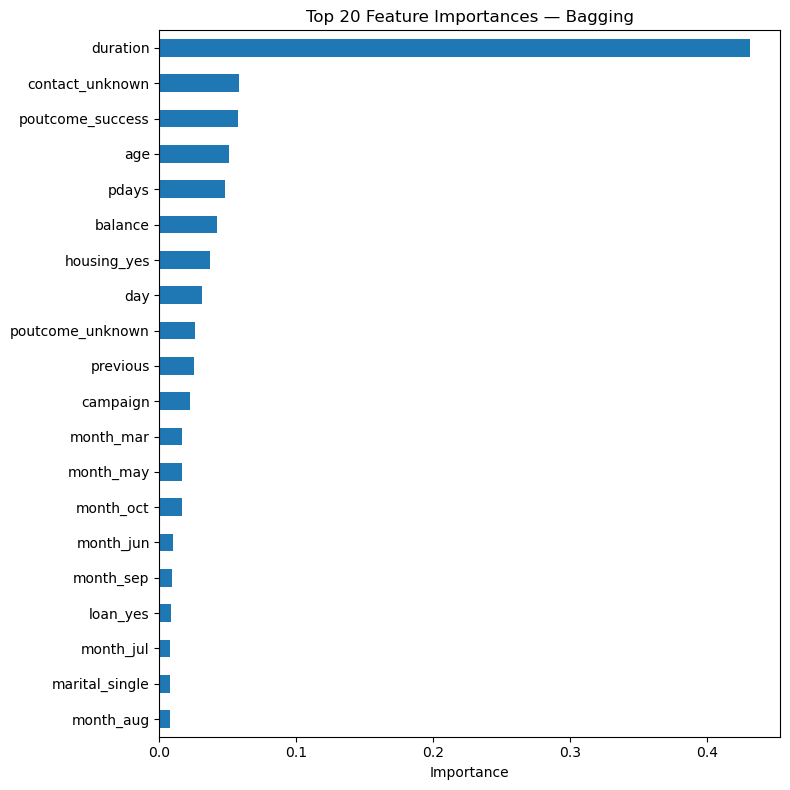

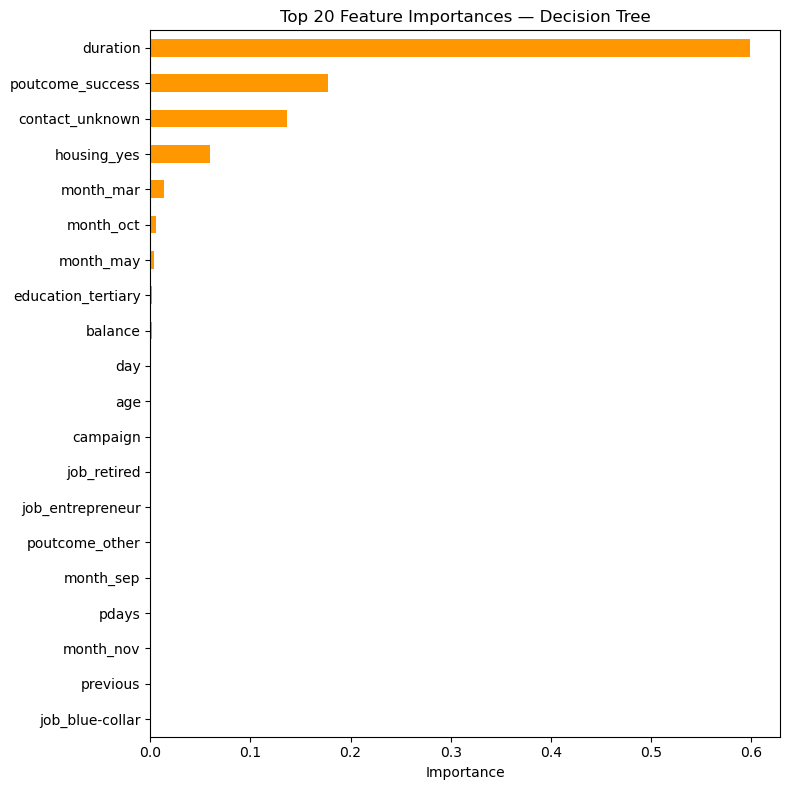

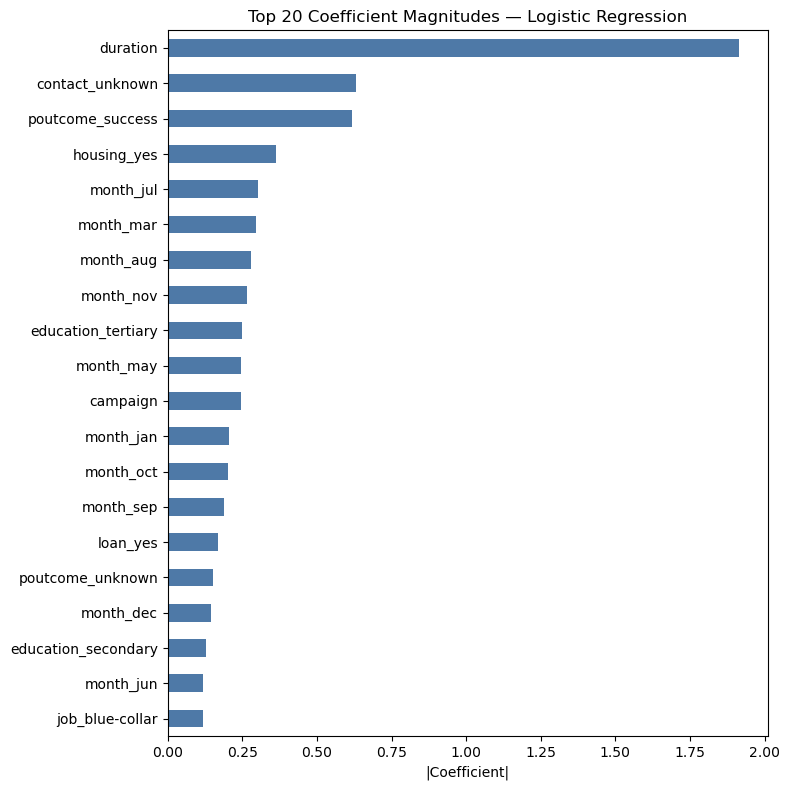

In [ ]:
feature_names = X.columns

# Bagging importance (Gini-based)
rf_imp = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 8))
rf_imp.head(20).iloc[::-1].plot(kind="barh")
plt.title("Top 20 Feature Importances — Bagging")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Decision Tree importance
dt_imp = pd.Series(dt.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 8))
dt_imp.head(20).iloc[::-1].plot(kind="barh", color="#ff9800")
plt.title("Top 20 Feature Importances — Decision Tree")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Logistic Regression (absolute standardized coefficients)
lr_coef = pd.Series(np.abs(log_reg.coef_.ravel()), index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 8))
lr_coef.head(20).iloc[::-1].plot(kind="barh", color="#4e79a7")
plt.title("Top 20 Coefficient Magnitudes — Logistic Regression")
plt.xlabel("|Coefficient|")
plt.tight_layout()
plt.show()


**Notes**

The analysis showed that **duration** is by far the most important predictor across all models, followed by variables like poutcome_success, contact_unknown, housing_yes, and balance.

Features such as month, marital status, and some job categories had low individual importance, but when removed, model performance slightly decreased.
This indicates that even weak predictors contribute complementary information that helps the models generalize better.

For this reason, all encoded variables were kept to preserve stability and overall predictive power.

Comparison of Models

In [20]:
metrics_df = pd.DataFrame({
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred),
    ],
    "Precision": [
        precision_score(y_test, lr_pred),
        precision_score(y_test, dt_pred),
        precision_score(y_test, rf_pred),
    ],
    "Recall": [
        recall_score(y_test, lr_pred),
        recall_score(y_test, dt_pred),
        recall_score(y_test, rf_pred),
    ],
    "F1": [
        f1_score(y_test, lr_pred),
        f1_score(y_test, dt_pred),
        f1_score(y_test, rf_pred),
    ],
    "ROC_AUC": [
        roc_auc_score(y_test, lr_proba),
        roc_auc_score(y_test, dt_proba),
        roc_auc_score(y_test, rf_proba),
    ]
}, index=["LogReg", "DecisionTree", "Bagging"])

print("Summary (test set)")
display(metrics_df.round(3))

Summary (test set)


,Accuracy,Precision,Recall,F1,ROC_AUC
LogReg,0.820,0.828,0.789,0.808,0.906
DecisionTree,0.791,0.807,0.741,0.772,0.873
Bagging,0.836,0.809,0.861,0.834,0.915


**Notes**

- Model performance **improves progressively** from Logistic Regression → Decision Tree → Bagging.  
- **Bagging** achieved the highest **accuracy (83%)** and **ROC-AUC (0.91)**, showing strong discriminatory power between subscribers and non-subscribers.  
- **Decision Tree** remains valuable for interpretability — it explains the decision process with simple rules.  
- **Logistic Regression** provides transparency in coefficients, useful for understanding how each variable affects deposit likelihood.

*Business Interpretation*

- The Bagging's performance suggests that the bank can predict term deposit subscription with **around 83–85% reliability**.  
- Important drivers of subscription likely include:  
  - **Call duration** (longer conversations = higher chance to subscribe).  
  - **Previous successful contact (`poutcome_success`)**.  
  - **Number of previous interactions (`previous`)**.  
  - **Account balance and contact type**.  
- These findings help the marketing team focus resources on **clients with higher engagement history and financial stability**.

